     Month  Accidental deaths in USA: monthly, 1973 ? 1978
0  1973-01                                            9007
1  1973-02                                            8106
2  1973-03                                            8928
3  1973-04                                            9137
4  1973-05                                           10017
Index(['Month', 'Accidental deaths in USA: monthly, 1973 ? 1978'], dtype='object')


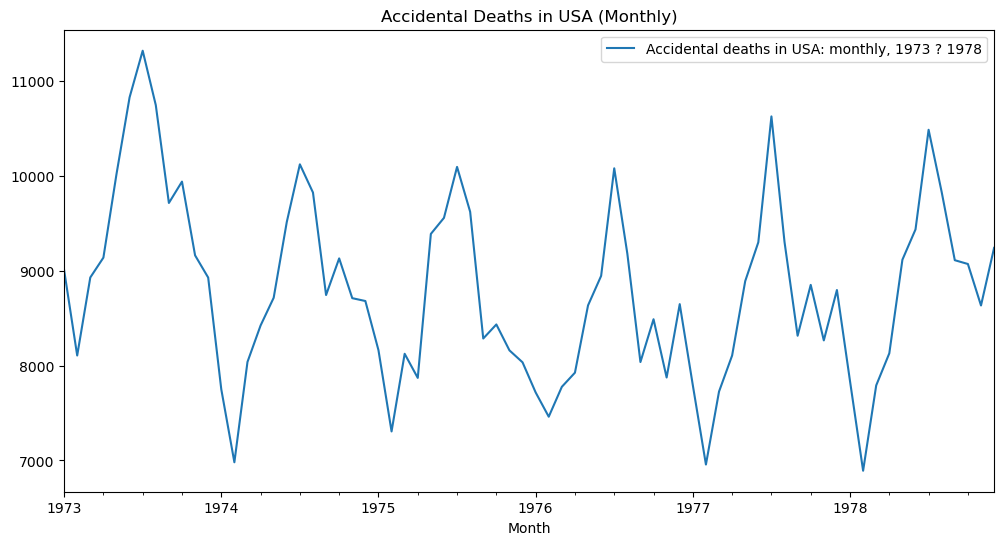

Linear Regression MAE: 871.4509859399501
Linear Regression RMSE: 1013.1665975835625
                                             SARIMAX Results                                              
Dep. Variable:     Accidental deaths in USA: monthly, 1973 ? 1978   No. Observations:                   72
Model:                                             ARIMA(5, 1, 0)   Log Likelihood                -566.662
Date:                                            Fri, 07 Feb 2025   AIC                           1145.324
Time:                                                    14:40:31   BIC                           1158.900
Sample:                                                01-01-1973   HQIC                          1150.723
                                                     - 12-01-1978                                         
Covariance Type:                                              opg                                         
                 coef    std err          z      P>|z|      

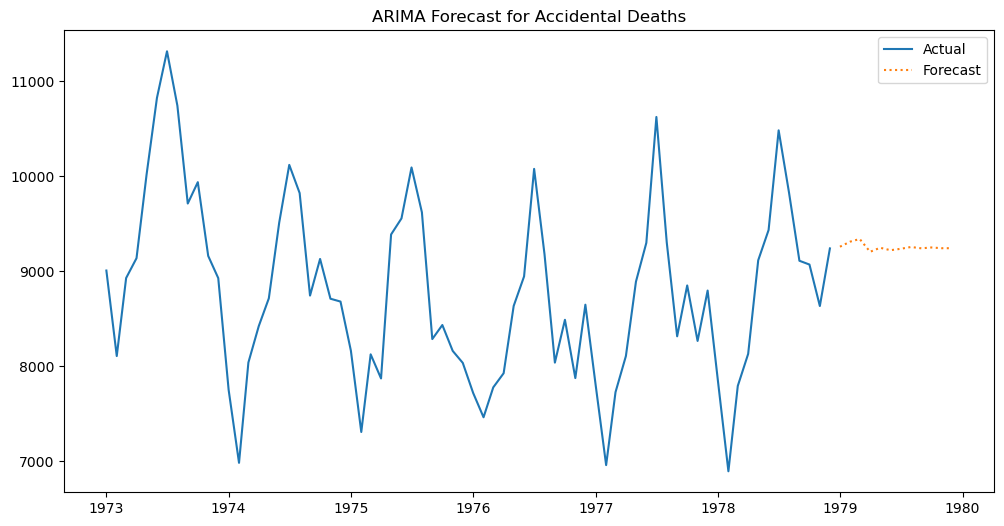

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

data_path = "C:/Users/HDC0422272/Downloads/accidental-deaths-in-usa-monthly.csv"

df = pd.read_csv(data_path)
print(df.head()) 
print(df.columns)  

date_column = "Month"  
if date_column not in df.columns:
    raise ValueError(f"Column '{date_column}' not found in CSV file. Available columns: {df.columns}")

df[date_column] = pd.to_datetime(df[date_column])  
df.set_index(date_column, inplace=True)  
df = df.sort_index()

df.plot(figsize=(12,6), title='Accidental Deaths in USA (Monthly)')
plt.show()

df['Month'] = df.index.month
df['Year'] = df.index.year

X = df[['Month', 'Year']]
y = df[df.columns[0]]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

arima_model = ARIMA(df[df.columns[0]], order=(5,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())

forecast = arima_result.forecast(steps=12)
plt.figure(figsize=(12,6))
plt.plot(df.index, df[df.columns[0]], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', linestyle='dotted')
plt.legend()
plt.title('ARIMA Forecast for Accidental Deaths')
plt.show()